In [1]:
import cv2 
import numpy as np
import pandas as pd
import zipfile

In [2]:
import tensorflow
print(tensorflow.__version__)

2025-07-31 11:49:44.519964: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-31 11:49:44.521903: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-31 11:49:44.561612: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-31 11:49:44.561636: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-31 11:49:44.562386: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

2.15.0


In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

O comando cv2.imshow() não funciona no jupyter, apenas plotei utilizando matplotlib

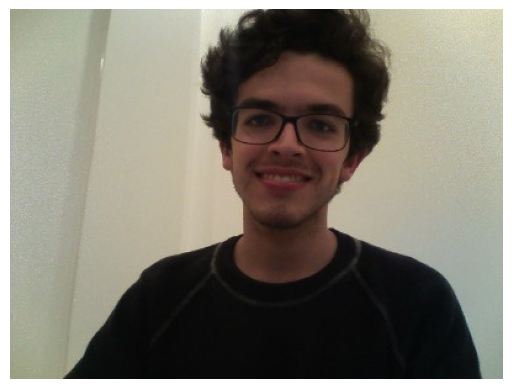

In [4]:
import matplotlib.pyplot as plt
imagem = cv2.imread('Material/testes/teste_gabriel.png')

imagem = cv2.imread('Material/testes/teste_gabriel.png')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.imshow(imagem)
plt.axis('off')
plt.show()

In [5]:
cascade_faces = 'Material/haarcascade_frontalface_default.xml' 
caminho_modelo = 'Material/modelo_01_expressoes.h5' #caminho do modelo ja treinado
face_detection = cv2.CascadeClassifier(cascade_faces) #Classificador para identificar faces
classificador_emocoes = load_model(caminho_modelo, compile = False) #Classificador emoções
expressoes = ['Raiva', 'Nojo', 'Medo', 'Feliz', 'Triste', 'Surpreso', 'Neutro'] #Possíveis expressões

2025-07-31 11:49:46.289404: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-31 11:49:46.292529: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
original = imagem.copy() #Copia da imagem original
faces = face_detection.detectMultiScale(original, scaleFactor = 1.1,
                                       minNeighbors = 3, minSize = (20,20))#Fazendo a detecção de onde está a face dentro da imagem

In [7]:
faces #Array de onde começa e termina a face

array([[163,  41, 124, 124]], dtype=int32)

In [8]:
len(faces)

1

In [9]:
faces.shape

(1, 4)

In [10]:
cinza = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY) #Conversão para escala de cinza para diminuir a dimensão

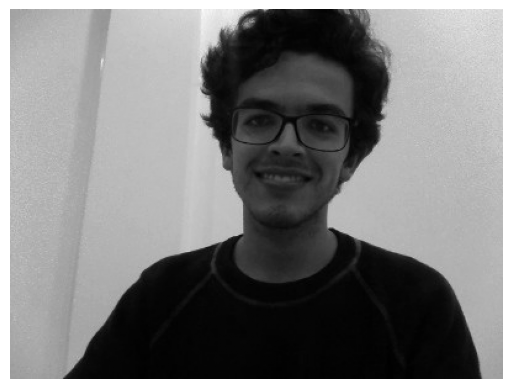

(300, 400)

In [11]:
plt.imshow(cinza, cmap='gray')
plt.axis('off')
plt.show()
cinza.shape

In [12]:
roi = cinza[40:40 + 128, 162:162 + 128] #ROI = Região de interesse

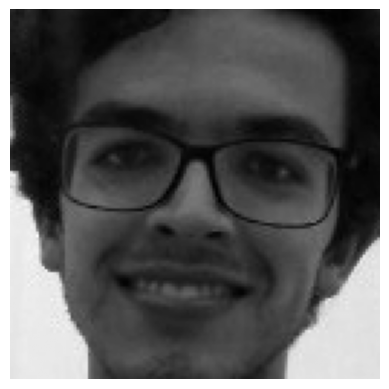

In [13]:
#Plot apenas da face
plt.imshow(roi, cmap='gray')
plt.axis('off')
plt.show()

In [14]:
roi.shape

(128, 128)

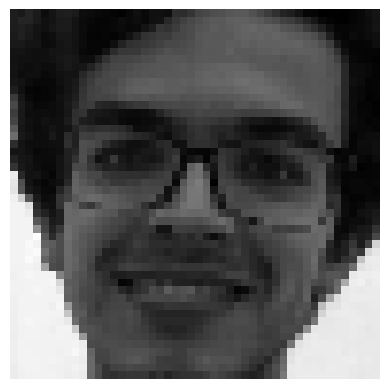

In [15]:
#Redimensionamento para o modelo, pois só é aceito imagens de 48x48
roi = cv2.resize(roi, (48,48))
plt.imshow(roi, cmap ='gray')
plt.axis('off')
plt.show()

In [16]:
#Normalização dos dados entre 0 e 1
roi = roi.astype('float')
roi.dtype

dtype('float64')

In [17]:
roi = roi/255
roi

array([[0.12156863, 0.10588235, 0.14117647, ..., 0.05882353, 0.07843137,
        0.09411765],
       [0.11764706, 0.1372549 , 0.1372549 , ..., 0.05882353, 0.07058824,
        0.09019608],
       [0.11764706, 0.12941176, 0.11372549, ..., 0.0627451 , 0.0745098 ,
        0.09411765],
       ...,
       [0.70588235, 0.71764706, 0.71764706, ..., 0.69019608, 0.69411765,
        0.68627451],
       [0.69803922, 0.71372549, 0.71764706, ..., 0.68627451, 0.69019608,
        0.68627451],
       [0.69803922, 0.70980392, 0.71372549, ..., 0.68235294, 0.68627451,
        0.69019608]])

In [18]:
#Redimensionamento para 48x48x1
roi = img_to_array(roi)
roi

array([[[0.12156863],
        [0.10588235],
        [0.14117648],
        ...,
        [0.05882353],
        [0.07843138],
        [0.09411765]],

       [[0.11764706],
        [0.13725491],
        [0.13725491],
        ...,
        [0.05882353],
        [0.07058824],
        [0.09019608]],

       [[0.11764706],
        [0.12941177],
        [0.11372549],
        ...,
        [0.0627451 ],
        [0.07450981],
        [0.09411765]],

       ...,

       [[0.7058824 ],
        [0.7176471 ],
        [0.7176471 ],
        ...,
        [0.6901961 ],
        [0.69411767],
        [0.6862745 ]],

       [[0.69803923],
        [0.7137255 ],
        [0.7176471 ],
        ...,
        [0.6862745 ],
        [0.6901961 ],
        [0.6862745 ]],

       [[0.69803923],
        [0.70980394],
        [0.7137255 ],
        ...,
        [0.68235296],
        [0.6862745 ],
        [0.6901961 ]]], dtype=float32)

In [19]:
roi = np.expand_dims(roi, axis = 0)

In [21]:
#1 imagem, 48 altura e largura e 1 escala de cor
roi.shape

(1, 48, 48, 1)

In [23]:
#Predições
preds = classificador_emocoes.predict(roi)[0]

1/1 [==============================] - 0s 202ms/step


In [26]:
#Chance de cada emoção ser a que está na imagem
preds

array([1.7134114e-05, 5.9817733e-09, 1.1286512e-05, 9.9059230e-01,
       1.8253699e-05, 1.8541808e-05, 9.3424544e-03], dtype=float32)

In [27]:
#Quantas emoções podem ser
len(preds)

7

In [28]:
emotion_probability = np.max(preds)
emotion_probability

0.9905923

In [29]:
preds.argmax()

3

In [33]:
#Emoção correspondente com o indice mais provavel
label = expressoes[preds.argmax()]
label

'Feliz'

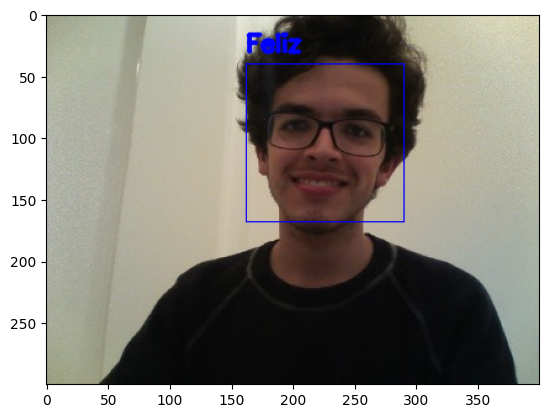

In [36]:
cv2.putText(original, label, (162, 40 -10), cv2.FONT_HERSHEY_SIMPLEX, 0.65,
           (0,0,255), 2, cv2.LINE_AA) #Configurações do texto
cv2.rectangle(original, (162,40), (162 + 128, 40 + 128), (0,0,255)) #Configuração do retangulo ajustado a face
plt.imshow(original)

In [42]:
probabilidades = np.ones((250,300,3), dtype = 'uint8')  * 255 #Criação array para representar as barras das chances de ser cada emoção

In [39]:
probabilidades

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [40]:
probabilidades.shape

(250, 300, 3)

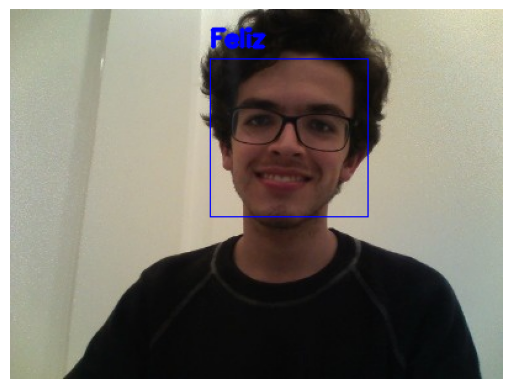

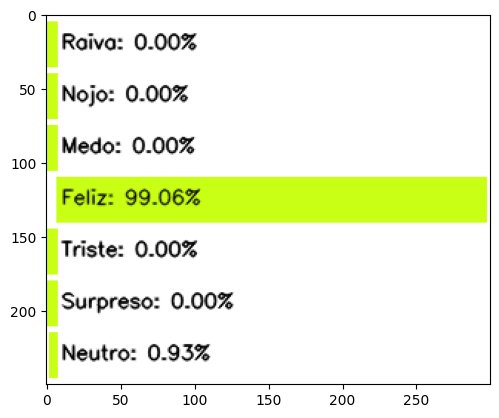

In [47]:
plt.imshow(original)  
plt.axis('off')
plt.show()
if len(faces) == 1: 
    for (i, (emotion, prob)) in enumerate(zip(expressoes, preds)):  
        text = '{}: {:.2f}%'.format(emotion, prob * 100)  
        w = int(prob * 300)  
        cv2.rectangle(probabilidades, (7, (i * 35) + 5), 
                      (w, (i * 35) + 35), (200, 255, 20), -1)  
        cv2.putText(probabilidades, text, (10, (i * 35) + 23),  
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 0), 1, cv2.LINE_AA)  

plt.imshow(probabilidades) 